## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset/ipl.csv')

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

## Data Cleaning

### --> Handling Missing Data

In [6]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

### --> Keeping only the necessary columns

In [7]:
columns_to_drop = ['mid', 'venue', 'batsman', 'bowler','striker','non-striker']
data.drop(labels=columns_to_drop ,axis=1 ,inplace=True)

data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### --> Selecting present teams only

In [8]:
data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
present_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
data = data[data.bat_team.isin(present_teams) & data.bowl_team.isin(present_teams)]

### --> Removing first 5 overs from the dataset (as it rarely affects the final score of the team in a T20 game)

In [11]:
data = data[data.overs >= 5.0 ]
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


## Correlation

In [12]:
data.corr()['total'].sort_values(ascending=False)

total             1.000000
runs_last_5       0.587091
runs              0.391254
overs             0.028468
wickets_last_5   -0.297397
wickets          -0.457055
Name: total, dtype: float64

<AxesSubplot:>

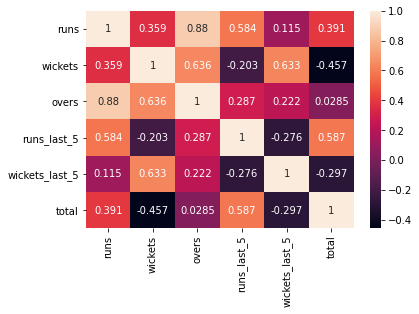

In [13]:
sns.heatmap(data.corr() ,annot=True ,fmt='.3g')

## Converting 'Date' from string to datetime object

In [14]:
from datetime import datetime 
# data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['date'] = data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))


## Converting Categorical Features to Numerical Ones (One-Hot Encoding)

In [15]:
encoded_data = pd.get_dummies(data=data , columns=['bat_team', 'bowl_team'])
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
encoded_data.columns


Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

## Splitting into Train & Test Data (splitting this way as it is a time-series data)

In [17]:
X_train = encoded_data.drop(labels='total' ,axis=1)[encoded_data['date'].dt.year <= 2016]
X_test = encoded_data.drop(labels='total', axis=1)[encoded_data['date'].dt.year >= 2017]

In [18]:
y_train = encoded_data[encoded_data['date'].dt.year <= 2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year >= 2017]['total'].values


### ---> Removing Date Column

In [19]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Model Building

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_predict_linear = model.predict(X_test)

In [22]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_linear)))


MAE: 12.118617546193244
MSE: 251.0079231041727
RMSE: 15.843229566732052


## Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
model = Ridge()


### ---> Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15, 1e-10, 1e-8,1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}
ridge_tuned = GridSearchCV(model ,parameters ,scoring='neg_mean_squared_error' ,cv=10)

In [25]:
ridge_tuned.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [26]:
ridge_tuned.best_params_

{'alpha': 40}

In [27]:
ridge_tuned.best_score_

-326.1762896662686

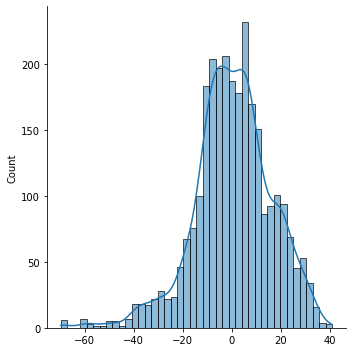

In [28]:
y_predict_ridge_tuned = ridge_tuned.predict(X_test)
sns.displot(x=y_test - y_predict_ridge_tuned ,kde=True)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_ridge_tuned))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_ridge_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_tuned)))


MAE: 12.11729452700503
MSE: 251.03172964112676
RMSE: 15.843980864704639


## Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
model_ = Lasso()

In [31]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8,1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}
lasso_tuned = GridSearchCV(model_, parameters, scoring='neg_mean_squared_error', cv=10)


In [32]:
lasso_tuned.fit(X_train ,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [33]:
lasso_tuned.best_params_

{'alpha': 1}

In [34]:
lasso_tuned.best_score_

-320.90408001754224

In [35]:
y_predict_lasso_tuned = lasso_tuned.predict(X_test)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_lasso_tuned))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_lasso_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso_tuned)))

MAE: 12.213583996827493
MSE: 262.36538279606964
RMSE: 16.19769683615759


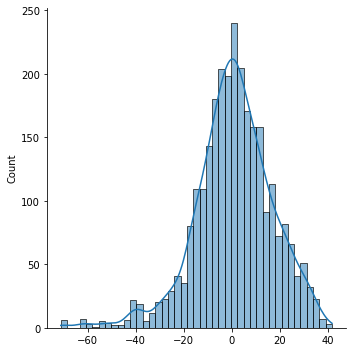

In [37]:
sns.displot(x=y_test - y_predict_lasso_tuned, kde=True)

## Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor 

model = DecisionTreeRegressor()
model.fit(X_train ,y_train)

DecisionTreeRegressor()

In [39]:
y_predict_dtr = model.predict(X_test)

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_dtr)))


MAE: 17.101871850251978
MSE: 539.0097192224622
RMSE: 23.216582849817975


## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
model.fit(X_train ,y_train)

RandomForestRegressor()

In [42]:
y_predict_rfr = model.predict(X_test)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_rfr))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_rfr)))

MAE: 13.752465082793377
MSE: 330.4430169110871
RMSE: 18.178091674075336


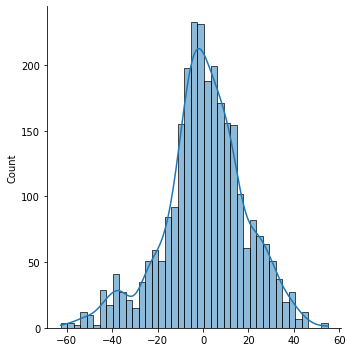

In [44]:
sns.displot(x=y_test - y_predict_rfr, kde=True)

# Model Evaluation

In [45]:
models = pd.DataFrame({
    'Model ': ['Linear', 'Ridge-Tuned', 'Lasso-Tuned',  'Decision-Tree', 'Random-Forest'],
    'MAE Score': [
        metrics.mean_absolute_error(y_test, y_predict_linear),
        metrics.mean_absolute_error(y_test, y_predict_ridge_tuned),
        metrics.mean_absolute_error(y_test, y_predict_lasso_tuned),
        metrics.mean_absolute_error(y_test, y_predict_dtr),
        metrics.mean_absolute_error(y_test, y_predict_rfr)
        ],
    'RMSE Score': [
        np.sqrt(metrics.mean_squared_error(y_test, y_predict_linear)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_tuned)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso_tuned)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predict_dtr)),
        np.sqrt(metrics.mean_squared_error(y_test, y_predict_rfr))
    ]})
    

models.sort_values(by='MAE Score' ,ascending =True)

,Model,MAE Score,RMSE Score
1,Ridge-Tuned,12.117295,15.843981
0,Linear,12.118618,15.843230
2,Lasso-Tuned,12.213584,16.197697
4,Random-Forest,13.752465,18.178092
3,Decision-Tree,17.101872,23.216583


# Predicting Score

In [46]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array = list()

    # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]


    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # converting to numpy array 
    temp_array = np.array([temp_array])

    return int(ridge_tuned.predict(temp_array)[0])


## Example 1

In [47]:
final_score = predict_score(batting_team='Kings XI Punjab', bowling_team='Kolkata Knight Riders',
                            overs=7, runs=90, wickets=1, runs_in_prev_5=60, wickets_in_prev_5=1)

print('The predicted First-Innings-Score : {} to {}'.format(final_score-5 ,final_score+10))


The predicted First-Innings-Score : 192 to 207
